# Exploratory Data Analysis on Laptop prices Dataset and using ML algorithms to predict Laptop Sales price

**Contributed by** 

Himanshu Singh (github: https://github.com/himanshus110)


#Exploratory Data Analysis

### Importing the libraries
First we'll import the essential libraries that will be used to perform EDA on the dataset.
We'll use pandas and numpy for performing actions on the dataset and we'll use matplotlib and seaborn for data visualization.


In [806]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###Inspecting the Data

In [807]:
data=pd.read_csv("data/laptop_data.csv")
data.head()

,Product,Price,Processor,RAM,Operating System,Storage,Display,Rating
0,Dell Inspiron Core i3 10th Gen - (8 GB/1 TB HD...,"Rs 39,990",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,3.6
1,Lenovo Ideapad S145 APU Dual Core A6 - (4 GB/1...,"Rs 22,990",AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,4.0
2,HP 15s Core i5 10th Gen - (8 GB/1 TB HDD/256 G...,"Rs 53,990",Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,4.3
3,Asus VivoBook 14 Ryzen 5 Quad Core 2nd Gen - (...,"Rs 42,990",AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,4.4
4,Lenovo Ideapad 3 Core i3 10th Gen - (4 GB/1 TB...,"Rs 33,990",Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,3.8


In [808]:
data.shape

(898, 8)

In [809]:
data.Price.describe()

count           898
unique          385
top       Rs 41,990
freq             24
Name: Price, dtype: object

**Checking for missing values**

In [810]:
data.isnull().sum()

Product             0
Price               0
Processor           0
RAM                 0
Operating System    0
Storage             1
Display             0
Rating              0
dtype: int64

**Imputing the missing value**

In [811]:
#Taking the mode of Storage and filling the missed value in the column with the most frequent value of the column

data["Storage"]=data["Storage"].fillna(data["Storage"].mode()[0])
data.isnull().sum()

Product             0
Price               0
Processor           0
RAM                 0
Operating System    0
Storage             0
Display             0
Rating              0
dtype: int64

In [812]:
data["Product"]= data["Product"].str.split().str[0:3].apply(lambda parts: " ".join(parts))
data.head()

,Product,Price,Processor,RAM,Operating System,Storage,Display,Rating
0,Dell Inspiron Core,"Rs 39,990",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,3.6
1,Lenovo Ideapad S145,"Rs 22,990",AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,4.0
2,HP 15s Core,"Rs 53,990",Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,4.3
3,Asus VivoBook 14,"Rs 42,990",AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,4.4
4,Lenovo Ideapad 3,"Rs 33,990",Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,3.8


#### Creating a new column that contains the name of the company that manufactured the laptop


In [813]:
#Taking the first word which is the Brand name from the Product column and creating a new column named Company 

data["Company"]=data["Product"].str.split().str[0]
data.head()

,Product,Price,Processor,RAM,Operating System,Storage,Display,Rating,Company
0,Dell Inspiron Core,"Rs 39,990",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,3.6,Dell
1,Lenovo Ideapad S145,"Rs 22,990",AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,4.0,Lenovo
2,HP 15s Core,"Rs 53,990",Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,4.3,HP
3,Asus VivoBook 14,"Rs 42,990",AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,4.4,Asus
4,Lenovo Ideapad 3,"Rs 33,990",Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,3.8,Lenovo


Removing the string part of the RAM column


In [814]:
#Removing string part because it's almost same for the entire column

data.RAM=data.RAM.str.split().str[0]
data.RAM=data.RAM.astype("int32")
data.head()

,Product,Price,Processor,RAM,Operating System,Storage,Display,Rating,Company
0,Dell Inspiron Core,"Rs 39,990",Intel Core i3 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,3.6,Dell
1,Lenovo Ideapad S145,"Rs 22,990",AMD APU Dual Core A6 Processor,4,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,4.0,Lenovo
2,HP 15s Core,"Rs 53,990",Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,4.3,HP
3,Asus VivoBook 14,"Rs 42,990",AMD Ryzen 5 Quad Core Processor (2nd Gen),8,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,4.4,Asus
4,Lenovo Ideapad 3,"Rs 33,990",Intel Core i3 Processor (10th Gen),4,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,3.8,Lenovo


Removing the "Rs" part of the Price column and then converting it to integer datatype

In [815]:
#Splitting the elements and removing the "Rs" part to obtain numbers
data["Price"] = data["Price"].str.split().str[1]
data.head()

,Product,Price,Processor,RAM,Operating System,Storage,Display,Rating,Company
0,Dell Inspiron Core,"39,990",Intel Core i3 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,3.6,Dell
1,Lenovo Ideapad S145,"22,990",AMD APU Dual Core A6 Processor,4,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,4.0,Lenovo
2,HP 15s Core,"53,990",Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,4.3,HP
3,Asus VivoBook 14,"42,990",AMD Ryzen 5 Quad Core Processor (2nd Gen),8,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,4.4,Asus
4,Lenovo Ideapad 3,"33,990",Intel Core i3 Processor (10th Gen),4,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,3.8,Lenovo


In [816]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           898 non-null    object 
 1   Price             898 non-null    object 
 2   Processor         898 non-null    object 
 3   RAM               898 non-null    int32  
 4   Operating System  898 non-null    object 
 5   Storage           898 non-null    object 
 6   Display           898 non-null    object 
 7   Rating            898 non-null    float64
 8   Company           898 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 59.8+ KB


In [817]:
#Removing the commas so that we can change the datatype of the column to int32
data.Price = data.Price.str.replace(",","")


In [818]:
data.Price=data.Price.astype("int32")

In [819]:
data.head()
#This is how our data looks like now

,Product,Price,Processor,RAM,Operating System,Storage,Display,Rating,Company
0,Dell Inspiron Core,39990,Intel Core i3 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,3.6,Dell
1,Lenovo Ideapad S145,22990,AMD APU Dual Core A6 Processor,4,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,4.0,Lenovo
2,HP 15s Core,53990,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,4.3,HP
3,Asus VivoBook 14,42990,AMD Ryzen 5 Quad Core Processor (2nd Gen),8,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,4.4,Asus
4,Lenovo Ideapad 3,33990,Intel Core i3 Processor (10th Gen),4,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,3.8,Lenovo


##Plotting the Graphs to gain more insight of our data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 <a list of 11 Text major ticklabel objects>)

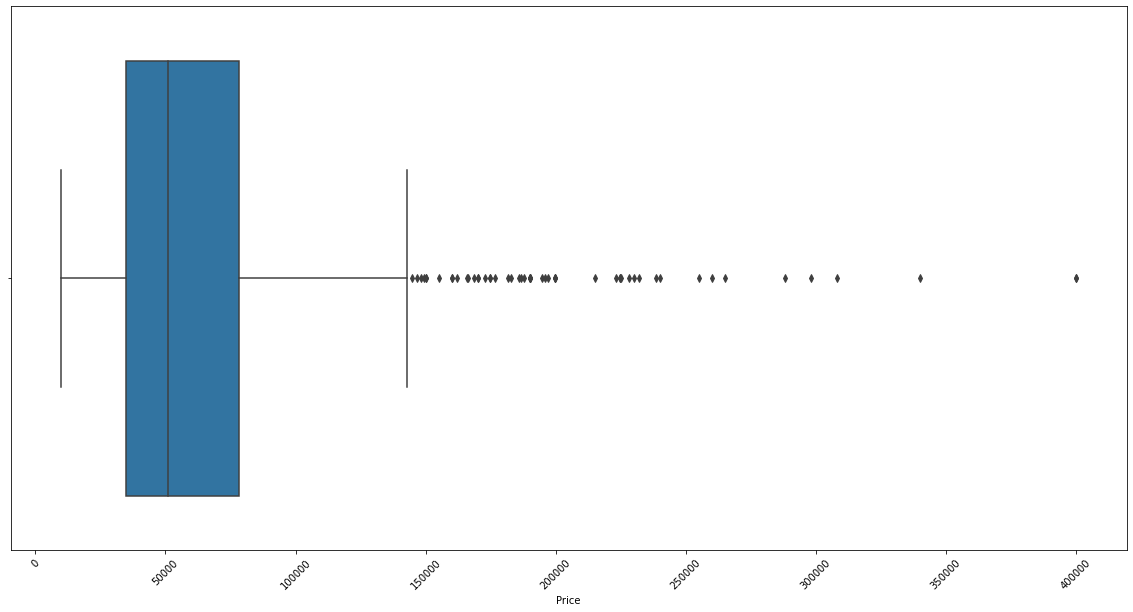

In [820]:
#Plotting the boxplot will help us to find out more about the Outliers

plt.figure(figsize=(20,10))
sns.boxplot(data['Price'])
plt.xticks(rotation=45)

##Treating the Outliers

In [821]:
# Finding the upper limit and lower limit using Inter-Quartile Range method 

percentile_25 = data.Price.quantile(0.25)
percentile_75 = data.Price.quantile(0.75)
iqr = percentile_75-percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
upper_limit,lower_limit

(143220.625, -29948.375)

In [822]:
data.Price.quantile(0.99)-data.Price.quantile(0.01)

223440.29999999958

In [823]:
data_without_outliers = data[(data["Price"]<upper_limit)]


In [824]:
data_without_outliers.shape

(844, 9)

In [825]:
data_without_outliers.Price.min()

9999

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


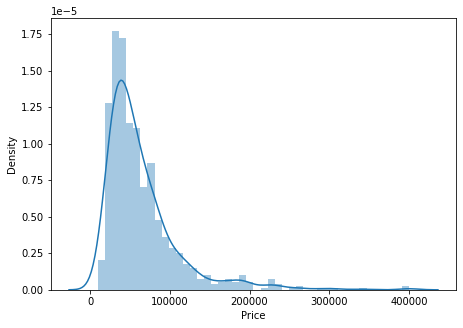

In [826]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Price'])

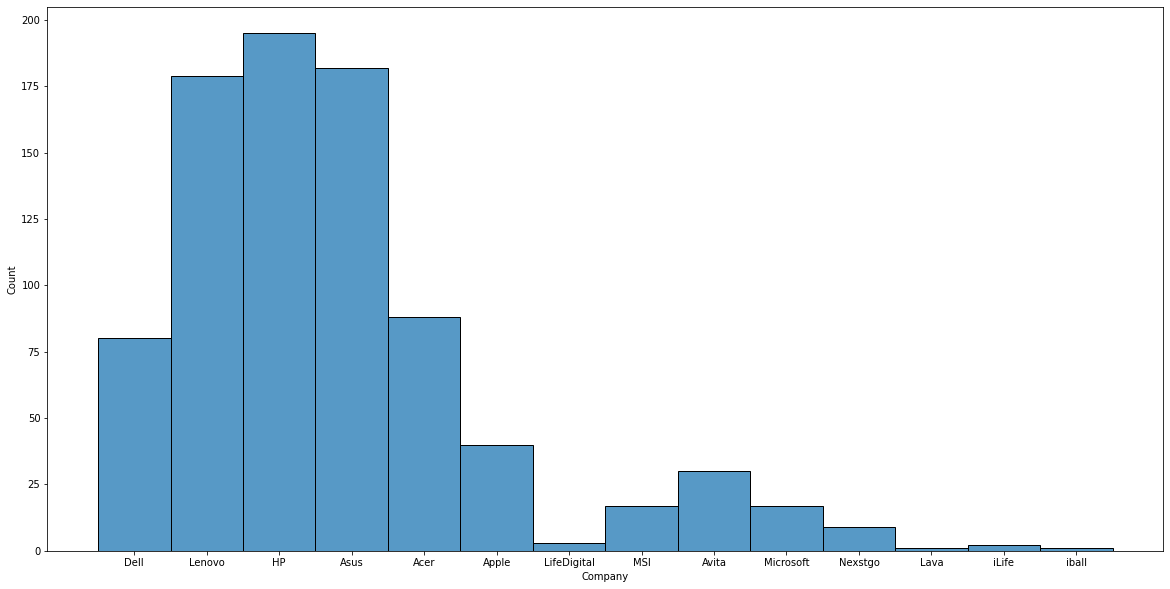

In [827]:
plt.figure(figsize=(20,10))
sns.histplot(data_without_outliers, x='Company')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

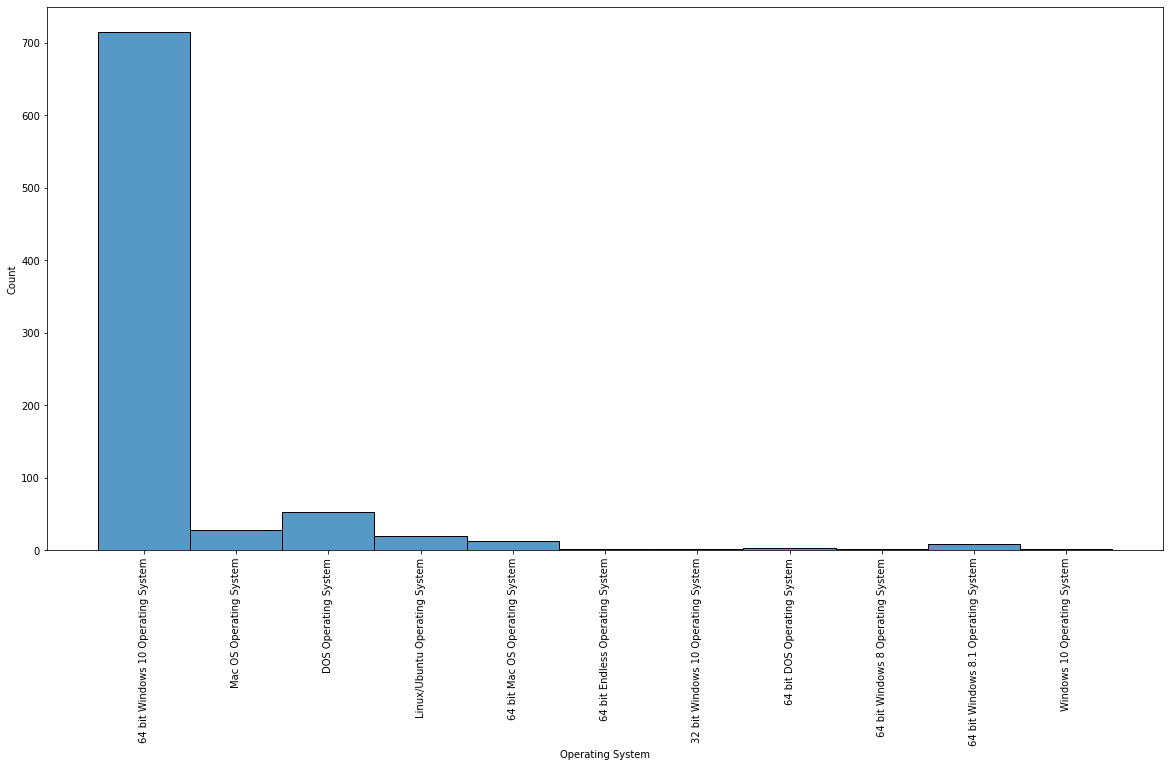

In [828]:
plt.figure(figsize=(20,10))
sns.histplot(data_without_outliers, x='Operating System')
plt.xticks(rotation=90)

##Checking the value counts of some columns


In [829]:
data["Operating System"].value_counts()

64 bit Windows 10 Operating System     745
DOS Operating System                    53
Mac OS Operating System                 45
Linux/Ubuntu Operating System           19
64 bit Mac OS Operating System          17
64 bit Windows 8.1 Operating System      8
64 bit DOS Operating System              3
Windows 10 Operating System              3
64 bit Endless Operating System          2
64 bit Windows 8 Operating System        2
32 bit Windows 10 Operating System       1
Name: Operating System, dtype: int64

In [830]:
data.Company.value_counts()

HP             204
Asus           184
Lenovo         180
Acer            90
Dell            81
Apple           62
Avita           30
MSI             26
Microsoft       21
Nexstgo          9
Alienware        4
LifeDigital      3
iLife            2
Lava             1
iball            1
Name: Company, dtype: int64

In [831]:
data.Display.value_counts()

39.62 cm (15.6 inch) Display                 492
35.56 cm (14 inch) Display                   196
33.78 cm (13.3 inch) Display                  54
35.56 cm (14 inch) Touchscreen Display        41
33.78 cm (13.3 inch) Touchscreen Display      20
43.94 cm (17.3 inch) Display                  13
34.29 cm (13.5 inch) Touchscreen Display      10
39.12 cm (15.4 inch) Display                   9
30.48 cm (12 inch) Display                     9
33.02 cm (13 inch) Display                     7
31.24 cm (12.3 inch) Touchscreen Display       5
29.46 cm (11.6 inch) Display                   4
HD LCD Anti-glare Display                      4
40.64 cm (16 inch) Display                     4
39.62 cm (15.6 inch) Touchscreen Display       4
40.89 cm (16.1 inch) Display                   3
1 Year Limited Warranty                        2
35.2 cm (13.86 inch) Display                   2
35.2 cm (13.86 inch) Touchscreen Display       2
38.1 cm (15 inch) Display                      2
Full HD LCD Anti-gla

In [832]:
data.Storage.value_counts()

1 TB HDD                                    318
512 GB SSD                                  203
256 GB SSD                                  125
1 TB HDD|256 GB SSD                          96
1 TB SSD                                     34
128 GB SSD                                   26
500 GB HDD                                   26
1 TB HDD|128 GB SSD                          25
2 TB HDD                                     12
1 TB HDD|512 GB SSD                          10
1 TB HDD|1 TB SSD                             6
1 TB HDD|8 GB SSD                             5
2 TB HDD|256 GB SSD                           4
35.56 cm (14 inch) Display                    2
500 GB HDD|8 GB SSD                           2
29.46 cm (11.6 inch) Display                  1
29.46 cm (11.6 inch) Touchscreen Display      1
128 GB HDD|128 GB SSD                         1
750 GB HDD                                    1
Name: Storage, dtype: int64

In [833]:
#x = data['Processor'].value_counts().loc[lambda x: x < 20]
#data['Processor'].replace(x.keys(),'Others',inplace=True)
#data.Processor.value_counts()

#The above code can be used to change the names of processors that have count below 20 to "Others"

###Copying the data

In [834]:
# Copy the data from which outliers have been removed

copied_data = data_without_outliers.copy()

# Drop the column "Product" because it isn't useful for training a model

copied_data.drop(["Product"],axis=1,inplace =True)

In [835]:
# Create dummies for the selected categorical columns so that it can be ready for training

dummies = pd.get_dummies(copied_data, columns=["Processor","Operating System","Storage","Display","Company"])

In [836]:
# Assign the price column to a variable 
y=dummies.Price

In [837]:
dummies

,Price,RAM,Rating,Processor_AMD APU Dual Core A4 Processor,Processor_AMD APU Dual Core A4 Processor (9th Gen),Processor_AMD APU Dual Core A6 Processor,Processor_AMD APU Dual Core A6 Processor (7th Gen),Processor_AMD APU Dual Core A9 Processor,Processor_AMD APU Dual Core A9 Processor (7th Gen),Processor_AMD APU Dual Core E1 Processor,...,Company_Dell,Company_HP,Company_Lava,Company_Lenovo,Company_LifeDigital,Company_MSI,Company_Microsoft,Company_Nexstgo,Company_iLife,Company_iball
0,39990,8,3.6,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,22990,4,4.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,53990,8,4.3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,42990,8,4.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33990,4,3.8,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,22490,4,3.8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
893,31529,4,4.2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
895,66990,16,4.2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
896,35800,8,4.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [838]:
# Drop the Price column from the data so that it can be used to train a model
dummies.drop(["Price"],axis=1,inplace=True)
X = dummies

#Splitting the data

In [839]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##Importing metrics


In [840]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

#Different ML Algorithms

##Linear Regression

In [841]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [842]:
pred =lr.predict(X_test)

In [843]:
mse=mean_squared_error(pred,y_test)
mse

3.321015892520252e+27

### r2 score of Linear Regression

In [844]:
r2_score(pred,y_test)

-0.01718607713054543

As you can see from the score above, Linear Regression has performed terribly on the data.

## Decision Tree Regressor

In [845]:
from sklearn.tree import DecisionTreeRegressor

In [846]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

r2 score of Decision Tree Regressor

In [847]:
r2_score(pred,y_test)

0.8111908165657512

#Random Forest Regressor


In [848]:
from sklearn.ensemble import RandomForestRegressor

In [849]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [850]:
r2_score(pred,y_test)

0.8711666676129665

#KNN Neighbours


In [851]:
from sklearn.neighbors import KNeighborsRegressor

In [852]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [853]:
r2_score(pred,y_test)

0.8346175480726385

#SVM